In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
#Read the data
dataset = pd.read_csv("Startup.csv")
dataset.head()

,Research_Spend,Administration,Marketing _Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
X=dataset.iloc[:,:-1].values

In [6]:
Y=dataset.iloc[:,4]

In [96]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
labelencoder=LabelEncoder()

In [55]:
data=dataset.iloc[:,3]


In [56]:
integer_encoded=labelencoder.fit_transform(data)
integer_encoded

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [59]:
dataset1=dataset.rename(columns={'State':'Sta'})
dataset1['states']=np.array(integer_encoded)
del dataset1['Sta']
dataset1.head()

,Research_Spend,Administration,Marketing _Spend,Profit,states
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [58]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Research_Spend    50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing _Spend  50 non-null     float64
 3   Profit            50 non-null     float64
 4   states            50 non-null     int32  
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [62]:
#check for missing values
dataset1.isna().sum()

Research_Spend      0
Administration      0
Marketing _Spend    0
Profit              0
states              0
dtype: int64

In [63]:
dataset1.corr()

,Research_Spend,Administration,Marketing _Spend,Profit,states
Research_Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing _Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
states,0.104685,0.011847,0.077670,0.101796,1.000000


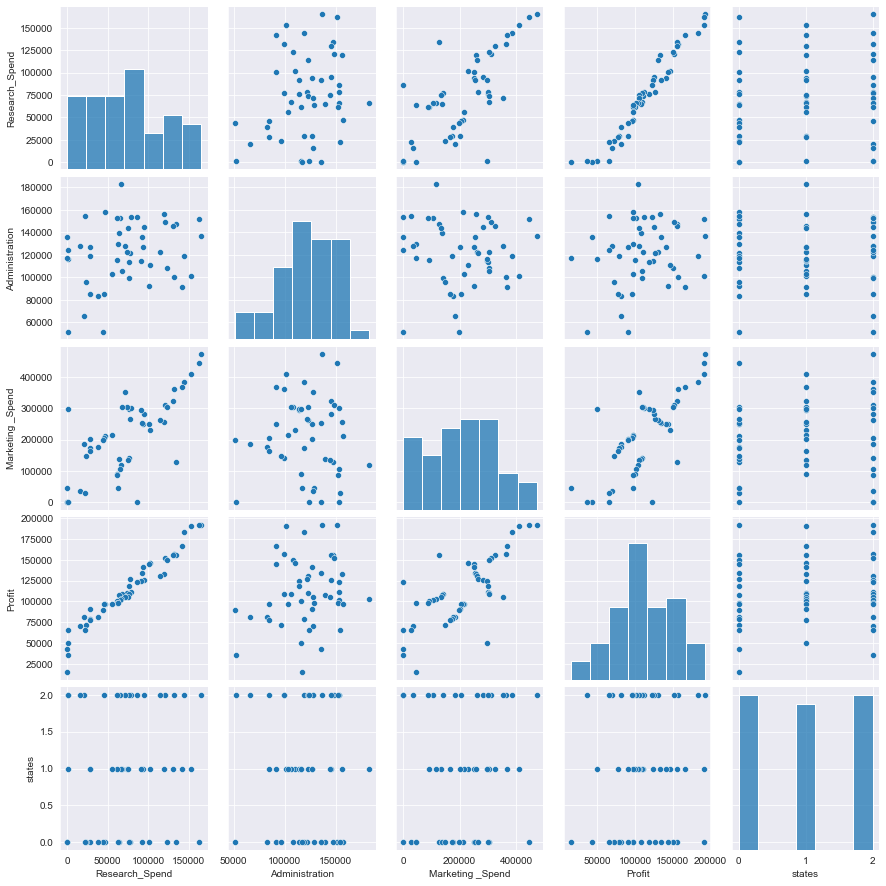

In [64]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(dataset1)

In [65]:
dataset1.columns=["Research_Spend","Administration","Marketing_Spend","Profit","states"]
dataset1.head()

,Research_Spend,Administration,Marketing_Spend,Profit,states
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [66]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Research_Spend+Administration+Marketing_Spend+states',data=dataset1).fit()

In [67]:
#Coefficients
model.params

Intercept          50142.506443
Research_Spend         0.805760
Administration        -0.026826
Marketing_Spend        0.027228
states               -22.320577
dtype: float64

In [68]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.368962
Research_Spend     17.608621
Administration     -0.519906
Marketing_Spend     1.636966
states             -0.013865
dtype: float64 
 Intercept          2.900008e-09
Research_Spend     8.249206e-22
Administration     6.056771e-01
Marketing_Spend    1.086131e-01
states             9.889988e-01
dtype: float64


In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           8.51e-29
Time:                        12:08:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
Research_Spend      0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
states            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
ml_a=smf.ols('Profit~Administration',data = dataset1).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [71]:
ml_m=smf.ols('Profit~Marketing_Spend',data=dataset1).fit()
print(ml_m.tvalues,'\n',ml_m.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [99]:
ml_am=smf.ols('Profit~Marketing_Spend+Administration',data = dataset1).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  
ml_am.summary()

Intercept          1.142741
Marketing_Spend    8.281039
Administration     2.467779
dtype: float64 
 Intercept          2.589341e-01
Marketing_Spend    9.727245e-11
Administration     1.729198e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           2.50e-10
Time:                        12:13:04   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
rsq_Research= smf.ols('Research_Spend~Administration+Marketing_Spend+states',data=dataset1).fit().rsquared  
vif_Research = 1/(1-rsq_Research) 
rsq_Administration = smf.ols('Administration~Research_Spend+Marketing_Spend+states',data=dataset1).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketing = smf.ols('Marketing_Spend~Research_Spend+Administration+states',data=dataset1).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing)
rsq_State= smf.ols('states~Research_Spend+Administration+Marketing_Spend',data=dataset1).fit().rsquared  
vif_State = 1/(1-rsq_State)



# Storing vif values in a data frame
d1 = {'Variables':["Research_Spend","Administration","Marketing_Spend","states"],'VIF':[vif_Research,vif_Administration,vif_Marketing,vif_State]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Research_Spend,2.481178
1,Administration,1.175315
2,Marketing_Spend,2.326780
3,states,1.011281


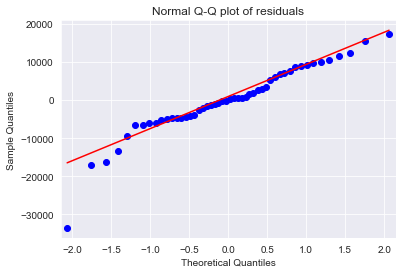

In [74]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [75]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

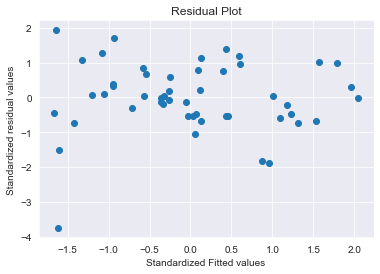

In [76]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

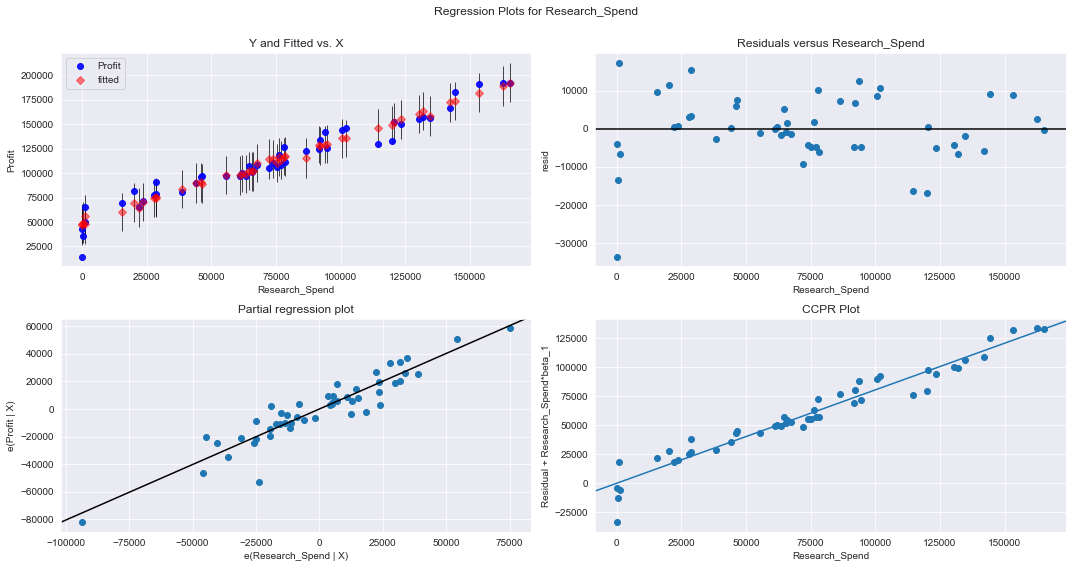

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Research_Spend", fig=fig)
plt.show()

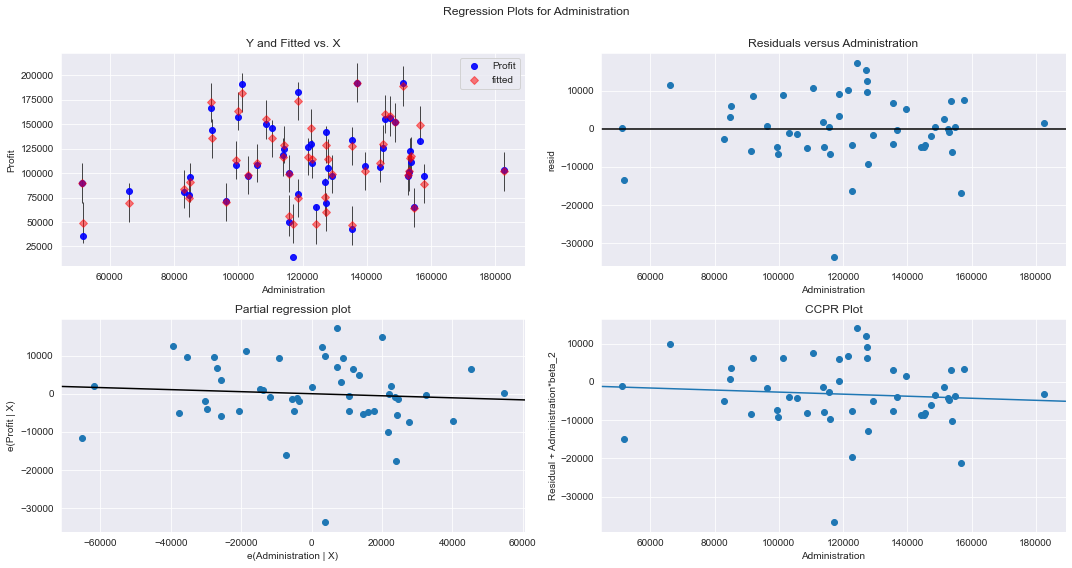

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

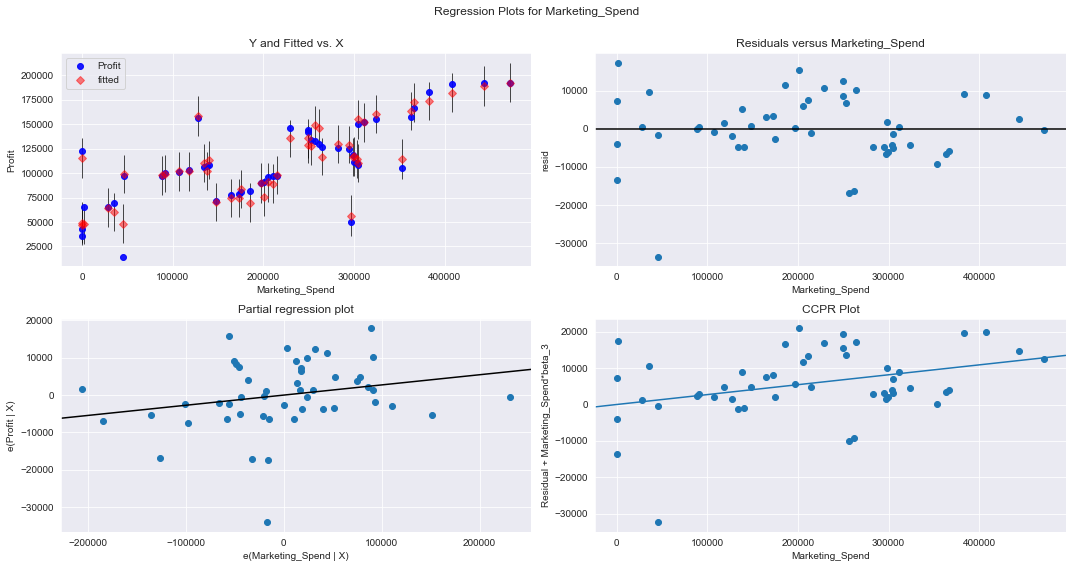

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

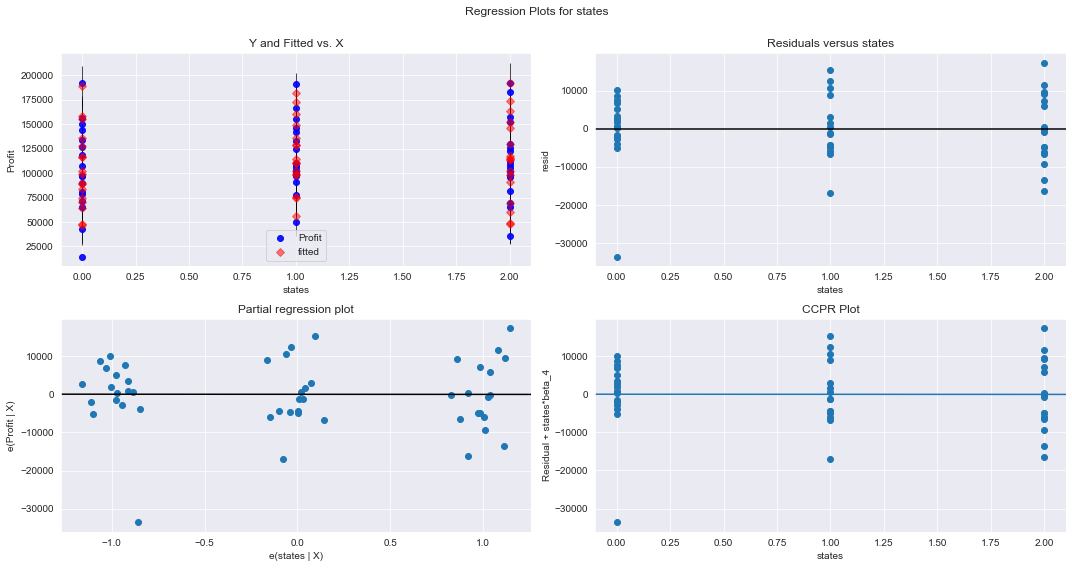

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "states", fig=fig)
plt.show()

In [81]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

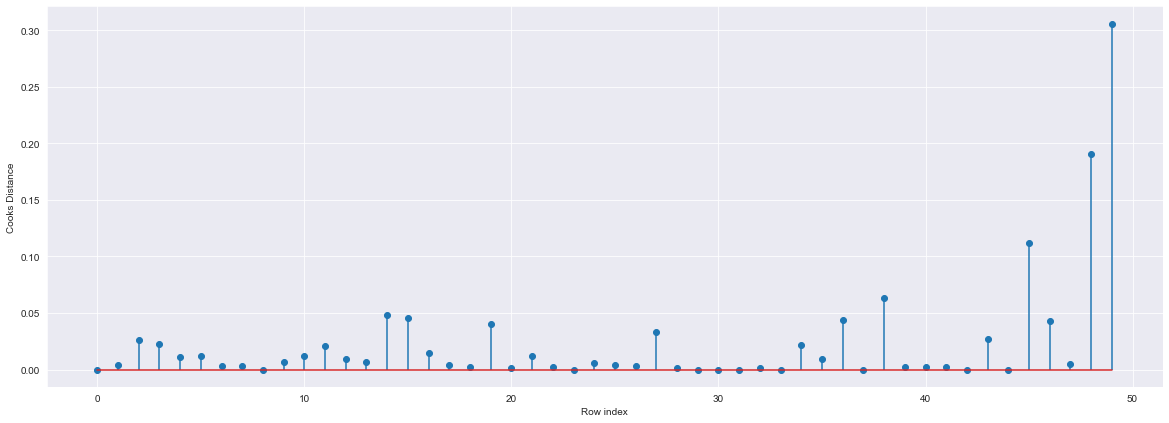

In [82]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dataset1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [83]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

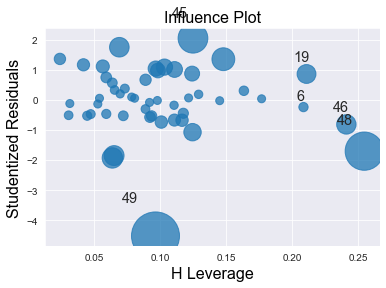

In [84]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [85]:
k = dataset1.shape[1]
n = dataset1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [106]:
X=dataset1.iloc[:,1:]

In [107]:
Y=dataset1.iloc[:,4].values

In [108]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [109]:
# Fitting Multiple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
#Predicting the Test set result 
y_pred = regressor.predict(X_test)
y_pred

array([1.00000000e+00, 4.92965333e-16, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [113]:
from sklearn.metrics import mean_squared_error 
print("The Mean Squared Error is- {}".format(mean_squared_error(Y_test, y_pred))) 


The Mean Squared Error is- 9.948978699834638e-32
